In [1]:
from core import BlackjackNN, BlackjackDNN, MetricsCallback

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import json

2023-12-28 23:09:03.543479: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-28 23:09:03.594580: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-28 23:09:03.595212: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-28 23:09:04.599367: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def cargar_datos(csv_file):
    df                 = pd.read_csv(csv_file)
    df['Mano Jugador'] = df['Mano Jugador'].apply(json.loads)
    df['Mano Crupier'] = df['Mano Crupier'].apply(json.loads)
    df['Accion']       = df['Accion'].apply(json.loads)
    return df

In [3]:
df = cargar_datos('resultados_blackjack.csv')
df

,Mano Jugador,Mano Crupier,Accion,Resultado
0,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 0]",-1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]","[1, 0]",-1
2,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 1]",-1
3,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",1
4,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",1
...,...,...,...,...
999995,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0]",-1
999996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 1]",1
999997,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","[1, 0]",-1
999998,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[1, 0]",-1


In [4]:
# Crear df_training concatenando las columnas relevantes
df_training = pd.DataFrame(df.apply(lambda x: x['Mano Jugador'] + x['Mano Crupier'] + x['Accion'], axis=1), columns=['Features'])
# Crear df_labels con solo la columna Resultado
df_labels = df[['Resultado']]

In [5]:
# Convertir los datos a numpy arrays
X = np.array(df_training['Features'].tolist())
y = np.array(df_labels['Resultado'])
y = to_categorical(y, num_classes=3) 

# Separar en train - test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y compilar la red neuronal
input_size  = X_train.shape[1]  
output_size = y.shape[1] 

In [6]:
network = BlackjackNN(input_size, output_size)
network.compile()

# Entrenar el modelo
metrics_callback = MetricsCallback()
history = network.model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), callbacks=[metrics_callback])

2023-12-28 23:09:29.641177: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-12-28 23:09:29.732625: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 179200000 exceeds 10% of free system memory.


Epoch 1/3
25000/25000 [==============================] - 34s 1ms/step - loss: 0.6388 - accuracy: 0.7206 - val_loss: 0.6229 - val_accuracy: 0.7250
Epoch 2/3
25000/25000 [==============================] - 30s 1ms/step - loss: 0.6254 - accuracy: 0.7240 - val_loss: 0.6188 - val_accuracy: 0.7271
Epoch 3/3
25000/25000 [==============================] - 31s 1ms/step - loss: 0.6235 - accuracy: 0.7244 - val_loss: 0.6159 - val_accuracy: 0.7264


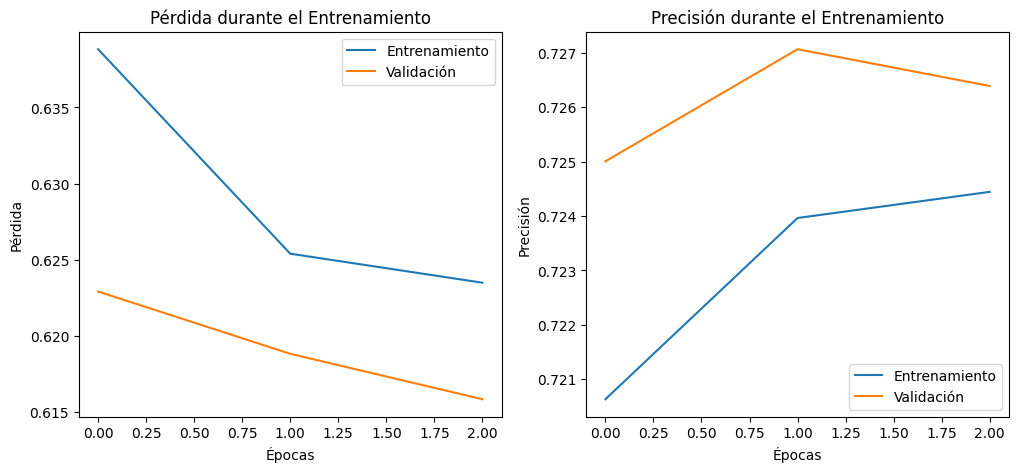

In [7]:
metrics_callback.visualize()

In [8]:
network = BlackjackDNN(input_size, output_size)
network.compile()

# Entrenar el modelo
metrics_callback = MetricsCallback()
history = network.model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), callbacks=[metrics_callback])

Epoch 1/3


2023-12-28 23:11:05.190779: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 179200000 exceeds 10% of free system memory.


25000/25000 [==============================] - 35s 1ms/step - loss: 0.6299 - accuracy: 0.7227 - val_loss: 0.6147 - val_accuracy: 0.7270
Epoch 2/3
25000/25000 [==============================] - 33s 1ms/step - loss: 0.6195 - accuracy: 0.7256 - val_loss: 0.6187 - val_accuracy: 0.7260
Epoch 3/3
25000/25000 [==============================] - 35s 1ms/step - loss: 0.6183 - accuracy: 0.7261 - val_loss: 0.6152 - val_accuracy: 0.7268


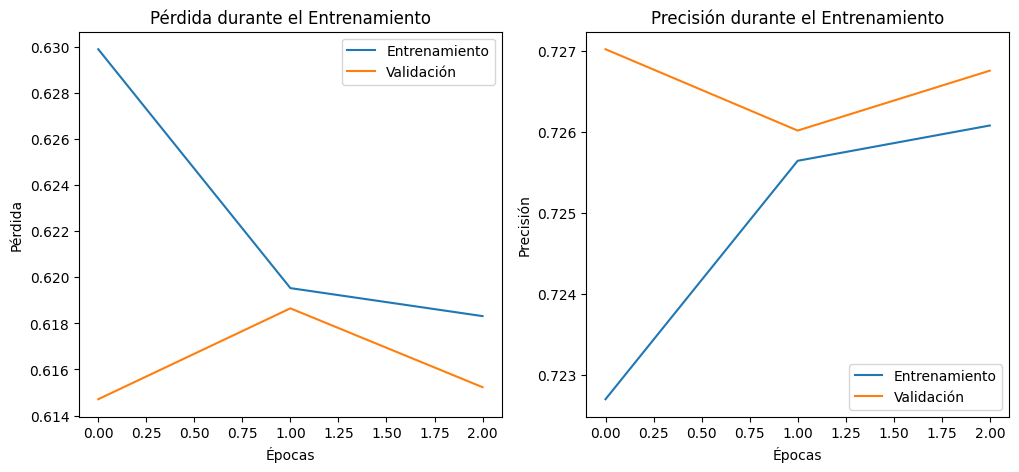

In [9]:
metrics_callback.visualize()

In [10]:
history = network.model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), callbacks=[metrics_callback])

Epoch 1/3
   36/25000 [..............................] - ETA: 35s - loss: 0.6551 - accuracy: 0.7196  

2023-12-28 23:13:15.883846: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 179200000 exceeds 10% of free system memory.


25000/25000 [==============================] - 39s 2ms/step - loss: 0.6179 - accuracy: 0.7263 - val_loss: 0.6136 - val_accuracy: 0.7274
Epoch 2/3
25000/25000 [==============================] - 54s 2ms/step - loss: 0.6174 - accuracy: 0.7264 - val_loss: 0.6132 - val_accuracy: 0.7269
Epoch 3/3
25000/25000 [==============================] - 59s 2ms/step - loss: 0.6171 - accuracy: 0.7265 - val_loss: 0.6142 - val_accuracy: 0.7268


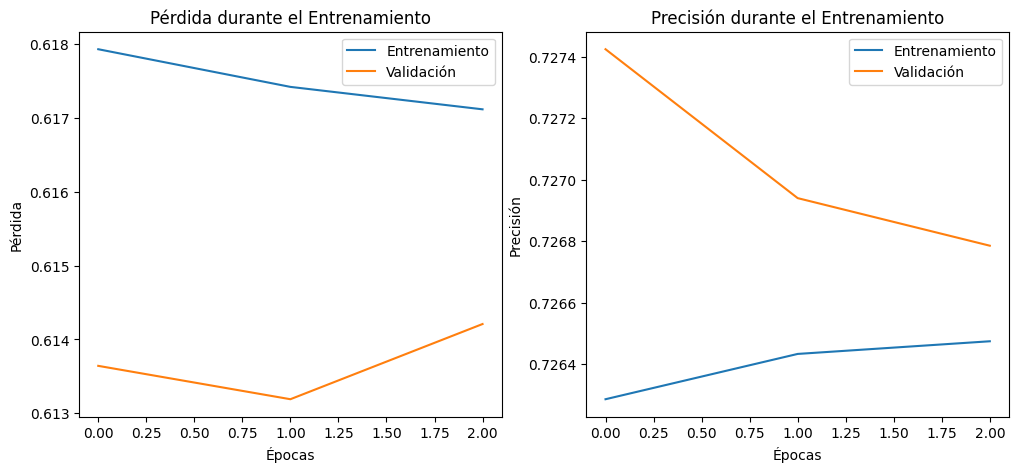

In [11]:
metrics_callback.visualize()